<a href="https://colab.research.google.com/github/Rehabah/Rumor-Detection/blob/main/rumor_detection_model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rumor Detection Model_ Final

###### last edition on 5 Sep

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
import joblib
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from matplotlib.legend_handler import HandlerLine2D

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataset=pd.read_excel(r"/content/gdrive/MyDrive/Rumor_detection/Rehab1-Final Data Set.xlsx")

In [ ]:
#copy datafraem
df=dataset

In [ ]:
len(df)

2264

In [ ]:
df.columns

Index(['Retweet_Count', 'Favorited', 'Retweeted', 'Lists', 'Verified',
       'Location', 'Description', 'Time_span', 'E_score', 'Followers/Friends',
       'Favorite/Statu', 'Status_count', 'Followers', 'Fovorites_count',
       'Protected', 'Name', 'Friends', 'Screen_name', 'Matching', 'Multimidia',
       'URL', 'Hashtags', 'Question_Mark', 'Phone_num', 'Result'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retweet_Count      2264 non-null   int64  
 1   Favorited          2264 non-null   bool   
 2   Retweeted          2264 non-null   bool   
 3   Lists              2264 non-null   int64  
 4   Verified           2264 non-null   bool   
 5   Location           2264 non-null   bool   
 6   Description        2264 non-null   bool   
 7   Time_span          2264 non-null   int64  
 8   E_score            2264 non-null   float64
 9   Followers/Friends  2264 non-null   float64
 10  Favorite/Statu     2264 non-null   float64
 11  Status_count       2264 non-null   int64  
 12  Followers          2264 non-null   int64  
 13  Fovorites_count    2264 non-null   int64  
 14  Protected          2264 non-null   bool   
 15  Name               2264 non-null   bool   
 16  Friends            2264 

In [ ]:
df.isnull().sum()

Retweet_Count        0
Favorited            0
Retweeted            0
Lists                0
Verified             0
Location             0
Description          0
Time_span            0
E_score              0
Followers/Friends    0
Favorite/Statu       0
Status_count         0
Followers            0
Fovorites_count      0
Protected            0
Name                 0
Friends              0
Screen_name          0
Matching             0
Multimidia           0
URL                  0
Hashtags             0
Question_Mark        0
Phone_num            0
Result               0
dtype: int64

In [ ]:
df.head()

,Retweet_Count,Favorited,Retweeted,Lists,Verified,Location,Description,Time_span,E_score,Followers/Friends,Favorite/Statu,Status_count,Followers,Fovorites_count,Protected,Name,Friends,Screen_name,Matching,Multimidia,URL,Hashtags,Question_Mark,Phone_num,Result
0,3,False,False,2,False,False,True,72,137.750000,0.905318,0.046884,9918,698,465,False,True,771,True,True,0,1,1,0,0,not rumor
1,0,False,False,0,False,False,True,3,5.666667,360.250000,13.058824,17,1441,222,False,False,4,False,True,0,1,2,0,0,not rumor
2,206,False,False,202,False,False,False,60,862.833333,0.984768,0.000097,51770,18102,5,False,False,18382,False,False,1,0,11,0,1,not rumor
3,58,False,False,0,False,False,True,1,465.000000,0.126316,1.896774,465,12,882,False,False,95,False,True,0,0,4,4,0,not rumor
4,60,False,False,0,False,True,False,24,21.416667,0.612903,0.110895,514,19,57,False,False,31,False,False,1,0,1,0,0,not rumor


In [ ]:
df = df.rename(columns={'Followers/Friends':'Followers_Friends','Favorite/Statu':'Favorite_Statu'})

In [ ]:
df.columns

Index(['Retweet_Count', 'Favorited', 'Retweeted', 'Lists', 'Verified',
       'Location', 'Description', 'Time_span', 'E_score', 'Followers_Friends',
       'Favorite_Statu', 'Status_count', 'Followers', 'Fovorites_count',
       'Protected', 'Name', 'Friends', 'Screen_name', 'Matching', 'Multimidia',
       'URL', 'Hashtags', 'Question_Mark', 'Phone_num', 'Result'],
      dtype='object')

In [ ]:
display(df)

,Retweet_Count,Favorited,Retweeted,Lists,Verified,Location,Description,Time_span,E_score,Followers_Friends,Favorite_Statu,Status_count,Followers,Fovorites_count,Protected,Name,Friends,Screen_name,Matching,Multimidia,URL,Hashtags,Question_Mark,Phone_num,Result
0,3,False,False,2,False,False,True,72,137.750000,0.905318,0.046884,9918,698,465,False,True,771,True,True,0,1,1,0,0,not rumor
1,0,False,False,0,False,False,True,3,5.666667,360.250000,13.058824,17,1441,222,False,False,4,False,True,0,1,2,0,0,not rumor
2,206,False,False,202,False,False,False,60,862.833333,0.984768,0.000097,51770,18102,5,False,False,18382,False,False,1,0,11,0,1,not rumor
3,58,False,False,0,False,False,True,1,465.000000,0.126316,1.896774,465,12,882,False,False,95,False,True,0,0,4,4,0,not rumor
4,60,False,False,0,False,True,False,24,21.416667,0.612903,0.110895,514,19,57,False,False,31,False,False,1,0,1,0,0,not rumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0,False,False,2,False,False,True,8,589.250000,0.000000,0.000000,4714,0,0,False,False,5039,False,True,1,1,2,0,0,rumor
2260,0,False,False,0,False,False,True,48,447.916667,0.107383,0.007302,21500,16,157,False,False,149,False,True,0,1,2,0,0,rumor
2261,0,False,False,0,False,False,True,48,2166.666667,0.000751,0.000067,104000,139,7,False,False,185000,False,True,1,1,3,0,0,rumor
2262,0,False,False,5,False,True,True,72,188.888889,0.260032,0.170956,13600,162,2325,False,True,623,False,False,0,0,3,0,0,rumor


In [ ]:
df=df.round()
df

,Retweet_Count,Favorited,Retweeted,Lists,Verified,Location,Description,Time_span,E_score,Followers_Friends,Favorite_Statu,Status_count,Followers,Fovorites_count,Protected,Name,Friends,Screen_name,Matching,Multimidia,URL,Hashtags,Question_Mark,Phone_num,Result
0,3,0,0,2,0,0,1,72,138.0,1.0,0.0,9918,698,465,0,1,771,1,1,0,1,1,0,0,0
1,0,0,0,0,0,0,1,3,6.0,360.0,13.0,17,1441,222,0,0,4,0,1,0,1,2,0,0,0
2,206,0,0,202,0,0,0,60,863.0,1.0,0.0,51770,18102,5,0,0,18382,0,0,1,0,11,0,1,0
3,58,0,0,0,0,0,1,1,465.0,0.0,2.0,465,12,882,0,0,95,0,1,0,0,4,4,0,0
4,60,0,0,0,0,1,0,24,21.0,1.0,0.0,514,19,57,0,0,31,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0,0,0,2,0,0,1,8,589.0,0.0,0.0,4714,0,0,0,0,5039,0,1,1,1,2,0,0,1
2260,0,0,0,0,0,0,1,48,448.0,0.0,0.0,21500,16,157,0,0,149,0,1,0,1,2,0,0,1
2261,0,0,0,0,0,0,1,48,2167.0,0.0,0.0,104000,139,7,0,0,185000,0,1,1,1,3,0,0,1
2262,0,0,0,5,0,1,1,72,189.0,0.0,0.0,13600,162,2325,0,1,623,0,0,0,0,3,0,0,1


In [ ]:
df['Result'].value_counts().plot(kind='bar')

In [ ]:
fig=pd.plotting.scatter_matrix(df[['Retweet_Count', 'Lists', 
       'Time_span', 'E_score', 'Followers_Friends',
       'Favorite_Statu', 'Status_count', 'Followers', 'Fovorites_count',
       'Friends']], alpha=0.2 , figsize =(18.5, 13.5) )

In [ ]:
sns.pairplot(df,hue='Result',palette='Dark2')

In [ ]:
df['Result']=df['Result'].replace(['rumor','not rumor'],[1,0])

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
df

,Retweet_Count,Favorited,Retweeted,Lists,Verified,Location,Description,Time_span,E_score,Followers_Friends,Favorite_Statu,Status_count,Followers,Fovorites_count,Protected,Name,Friends,Screen_name,Matching,Multimidia,URL,Hashtags,Question_Mark,Phone_num,Result
0,3,0,0,2,0,0,1,72,137.750000,0.905318,0.046884,9918,698,465,0,1,771,1,1,0,1,1,0,0,0
1,0,0,0,0,0,0,1,3,5.666667,360.250000,13.058824,17,1441,222,0,0,4,0,1,0,1,2,0,0,0
2,206,0,0,202,0,0,0,60,862.833333,0.984768,0.000097,51770,18102,5,0,0,18382,0,0,1,0,11,0,1,0
3,58,0,0,0,0,0,1,1,465.000000,0.126316,1.896774,465,12,882,0,0,95,0,1,0,0,4,4,0,0
4,60,0,0,0,0,1,0,24,21.416667,0.612903,0.110895,514,19,57,0,0,31,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0,0,0,2,0,0,1,8,589.250000,0.000000,0.000000,4714,0,0,0,0,5039,0,1,1,1,2,0,0,1
2260,0,0,0,0,0,0,1,48,447.916667,0.107383,0.007302,21500,16,157,0,0,149,0,1,0,1,2,0,0,1
2261,0,0,0,0,0,0,1,48,2166.666667,0.000751,0.000067,104000,139,7,0,0,185000,0,1,1,1,3,0,0,1
2262,0,0,0,5,0,1,1,72,188.888889,0.260032,0.170956,13600,162,2325,0,1,623,0,0,0,0,3,0,0,1


# Feature Selection 

######################

# Features Correlation 

In [ ]:
df.corr()

,Retweet_Count,Favorited,Retweeted,Lists,Verified,Location,Description,Time_span,E_score,Followers_Friends,Favorite_Statu,Status_count,Followers,Fovorites_count,Protected,Name,Friends,Screen_name,Matching,Multimidia,URL,Hashtags,Question_Mark,Phone_num,Result
Retweet_Count,1.000000,0.071492,-0.001089,0.002674,-0.005131,-0.009592,0.003410,0.045148,0.002440,-0.003323,-0.006534,0.017866,-0.005355,-0.003349,0.002081,0.027077,0.001784,0.031766,0.027991,-0.006864,-0.010051,-0.019738,-0.006195,-0.003546,0.042879
Favorited,0.071492,1.000000,0.044775,0.002711,-0.023806,0.092314,0.090011,0.098286,-0.054525,-0.012768,-0.005431,-0.011538,-0.003179,0.007465,-0.010993,0.087318,0.096262,0.105269,0.101165,0.038045,0.043648,-0.061514,-0.039989,-0.050155,0.716477
Retweeted,-0.001089,0.044775,1.000000,0.005093,-0.002346,0.006677,0.017795,0.034722,0.001921,-0.001321,-0.005520,0.023097,-0.003703,-0.005706,-0.001083,0.024332,0.068845,0.009545,0.008173,-0.000502,-0.008081,-0.007676,-0.004782,-0.006734,0.071478
Lists,0.002674,0.002711,0.005093,1.000000,0.358761,0.014313,0.085132,0.123686,0.426464,0.589782,-0.036815,0.616851,0.725122,-0.003146,0.017184,-0.020293,0.004398,0.015595,0.019599,0.163509,0.118637,0.201835,-0.010043,0.303298,-0.034522
Verified,-0.005131,-0.023806,-0.002346,0.358761,1.000000,0.063909,0.047205,0.109276,0.004344,0.498261,-0.013948,0.067061,0.506503,-0.010871,-0.002873,0.053052,-0.002717,0.084498,0.103486,0.013519,0.079337,0.001969,0.017484,-0.017864,-0.016927
Location,-0.009592,0.092314,0.006677,0.014313,0.063909,1.000000,0.146100,0.072911,0.005673,0.035305,0.001304,-0.000912,0.053107,0.033425,-0.004265,0.098899,-0.009757,0.139019,0.122324,-0.008738,0.005962,0.013270,0.002176,-0.019642,0.070430
Description,0.003410,0.090011,0.017795,0.085132,0.047205,0.146100,1.000000,0.142077,0.089284,0.024084,-0.058783,0.100651,0.052285,0.018269,0.021799,-0.017247,0.019798,0.004764,-0.005422,0.078134,-0.027413,0.031140,-0.016473,0.017507,0.062393
Time_span,0.045148,0.098286,0.034722,0.123686,0.109276,0.072911,0.142077,1.000000,-0.111687,0.068334,-0.069397,0.201649,0.138566,0.103621,0.008186,0.084948,0.061837,0.178888,0.111152,-0.075417,0.020099,-0.064104,-0.007992,-0.062336,0.058658
E_score,0.002440,-0.054525,0.001921,0.426464,0.004344,0.005673,0.089284,-0.111687,1.000000,0.015294,-0.053622,0.569521,0.108617,0.100643,0.016320,-0.015670,0.011870,-0.068703,-0.067868,0.190579,0.086928,0.220548,-0.001597,0.328447,-0.057406
Followers_Friends,-0.003323,-0.012768,-0.001321,0.589782,0.498261,0.035305,0.024084,0.068334,0.015294,1.000000,-0.008081,0.068545,0.722140,-0.006753,-0.001614,0.035535,-0.001539,0.053718,0.057733,0.017348,0.093066,0.002841,-0.007113,-0.010033,-0.014756


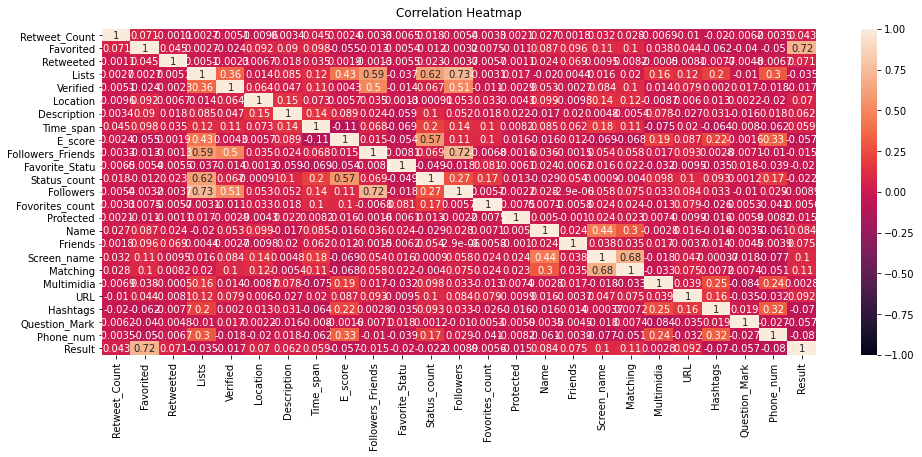

In [ ]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df.corr()[['Result']].sort_values(by='Result', ascending=False)

,Result
Result,1.000000
Favorited,0.716477
Matching,0.106586
Screen_name,0.099532
URL,0.091894
Name,0.083745
Friends,0.075352
Retweeted,0.071478
Location,0.070430
Description,0.062393


# Highly correlated Columns

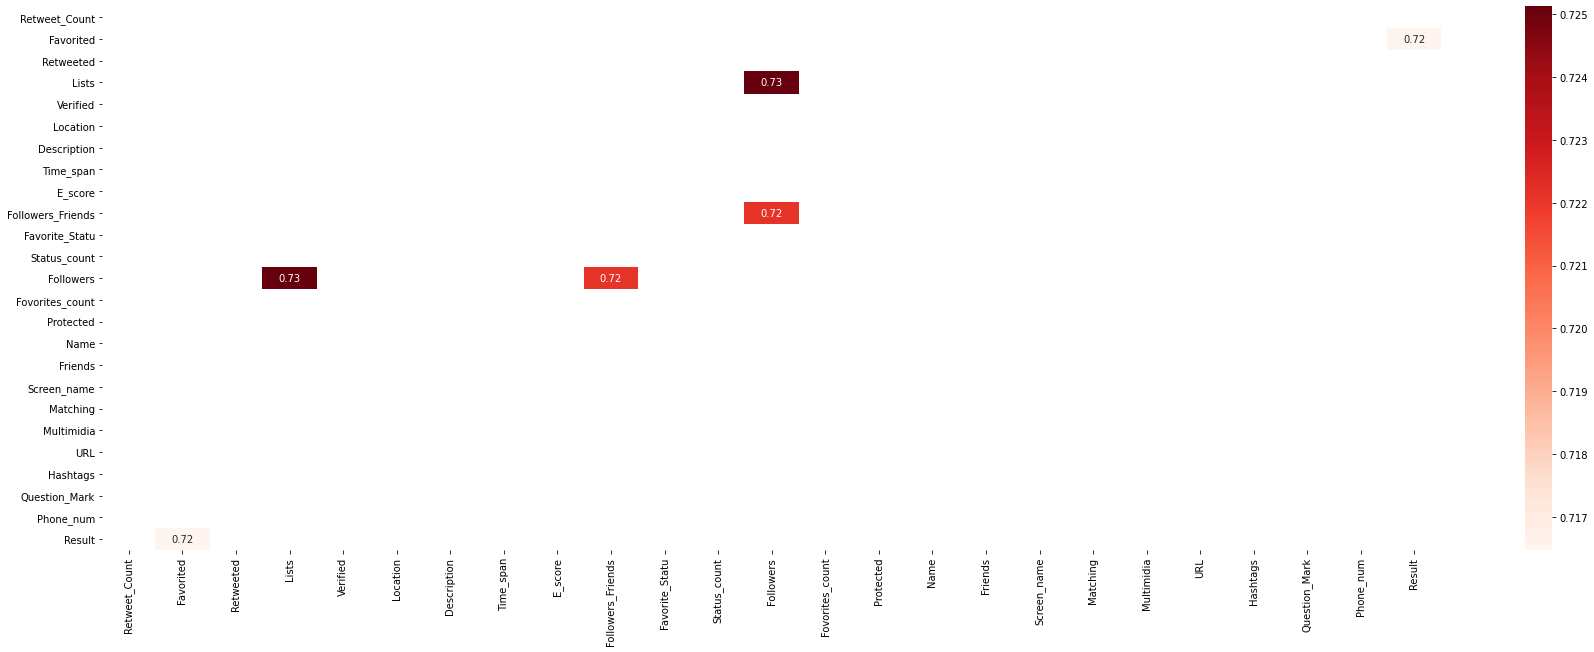

In [ ]:
#correlation values more than 0.7  
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .7) & (dfCorr != 1)) ]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
#correlated Columns
for i in df.columns:
    
  for j in df.columns:
  
    corr_= df[i].corr(df[j])
    #print(corr_)
    if (corr_ > 0.7) & (corr_<0.9):
        print(corr_)
        print (i)
        print( j)
        print('*****')
        

0.716477414290011
Favorited
Result
*****
0.7251224832101976
Lists
Followers
*****
0.722140353127687
Followers_Friends
Followers
*****
0.7251224832101976
Followers
Lists
*****
0.722140353127687
Followers
Followers_Friends
*****
0.716477414290011
Result
Favorited
*****


# Features Importance 

[2.97768454e-02 4.50184422e-01 2.43001599e-03 3.10215612e-02
 9.81137552e-04 1.10891382e-02 9.26046073e-03 4.21778703e-02
 4.36272645e-02 4.28312249e-02 4.09371157e-02 4.54670330e-02
 4.49649040e-02 3.97688868e-02 9.40948367e-05 8.15679314e-03
 6.61350902e-02 7.59393411e-03 7.95944878e-03 1.93775573e-02
 1.41631073e-02 3.47119842e-02 3.92485757e-03 3.36525225e-03]


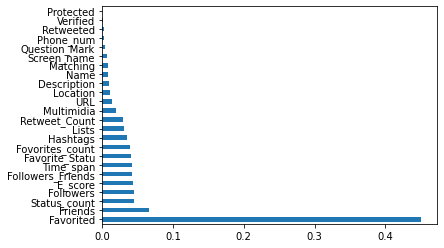

<Figure size 5760x6480 with 0 Axes>

In [ ]:
X = df.iloc[:,0:24]  #independent columns
y = df.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh',)
plt.figure(figsize=(80,90))
plt.show()

In [ ]:
#splitting the data (to use it on the next features selection methods)
y1=df['Result']
x1=df.drop('Result',axis=1)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3)

# Mutual Information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [ ]:
threshold = 6  # the number of features
high_score_features = []
feature_scores = mutual_info_classif(x_train1, y_train1, random_state=0)
for score, f_name in sorted(zip(feature_scores, x_train1.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)

Favorited 0.1727316183073626
Followers_Friends 0.06696320206332862
Friends 0.051277472517381684
Status_count 0.029522946459859423
Followers 0.02950337605520259
Fovorites_count 0.026685957488830736


In [ ]:
# df_wine_norm_mic = x_train1[high_score_features]
# print(df_wine_norm_mic.columns)

# PCA

Features reduction technique

In [ ]:
pca = PCA(n_components=5) #you can change the number of features
fit = pca.fit(x1)

print(fit.explained_variance_ratio_)

for score, f_name in sorted(zip(fit.explained_variance_ratio_, x1.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)

#print(fit.components_)

[9.88843260e-01 7.53179462e-03 3.37714999e-03 1.38887931e-04
 1.03455394e-04]
Retweet_Count 0.9888432601281026
Favorited 0.00753179461538535
Retweeted 0.003377149993845247
Lists 0.00013888793134804575
Verified 0.00010345539411825219


# Recursive Feature Elimination 

Works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In [ ]:
# %matplotlib inline
feat_sel = RFE(RandomForestClassifier(n_estimators=20), n_features_to_select=15) # you can select the number of features 
feat_sel.fit(x_train1, y_train1)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=20, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [ ]:
selected_feat = x_train1.columns[(feat_sel.get_support())]
print(selected_feat) #selected features

Index(['Retweet_Count', 'Favorited', 'Lists', 'Location', 'Time_span',
       'E_score', 'Followers_Friends', 'Favorite_Statu', 'Status_count',
       'Followers', 'Fovorites_count', 'Friends', 'Multimidia', 'URL',
       'Hashtags'],
      dtype='object')


# Choosing the highest impact features

In [ ]:
new_data=df[['Favorited','Followers','Friends','Status_count','Fovorites_count','E_score','Retweet_Count','Time_span','Result']]

In [ ]:
new_data.head()

,Favorited,Followers,Friends,Status_count,Fovorites_count,E_score,Retweet_Count,Time_span,Result
0,0,698,771,9918,465,138.0,3,72,0
1,0,1441,4,17,222,6.0,0,3,0
2,0,18102,18382,51770,5,863.0,206,60,0
3,0,12,95,465,882,465.0,58,1,0
4,0,19,31,514,57,21.0,60,24,0


In [ ]:
#splitting the data
y=new_data['Result']
x=new_data.drop('Result',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#Functions

In [ ]:
#AUC and ROC 

In [ ]:
def plotting_roc(test,prediction):
    print ('roc_auc_score', roc_auc_score(test,prediction))

    fpr, tpr, _ = roc_curve(test,prediction)

    print("Negative rate", fpr)
    print("Positive rate", tpr)
    print("***",_)

    plt.clf()
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()


In [ ]:
def   roc_curve_class (class_,model):

    tree_test_pred1= model.predict_proba(x_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(
        y_test, tree_test_pred, pos_label = class_)

    # AUC score that summarizes the precision recall curve
    avg_precision = average_precision_score(y_test, tree_test_pred1)

    label = 'Precision Recall AUC: {:.2f}'.format(avg_precision)
    plt.plot(recall, precision, lw = 2, label = label)
    plt.xlabel('Recall')  
    plt.ylabel('Precision')  
    plt.title('Precision Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

# SVM classifier

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1) # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(x_train, y_train)

In [ ]:
#Predict the class for test dataset
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision:",(metrics.precision_score(y_test, y_pred)*100))
print("Recall:",(metrics.recall_score(y_test, y_pred)*100))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
plotting_roc(y_test, y_pred)

In [ ]:
#saving the model
#joblib.dump(clf, 'svm.pkl')

In [ ]:
#Calling back the model 
#clf = joblib.load('svm.pkl')


# Hyperparametrs SVM

In [ ]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}

In [ ]:
# trying = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3)
# trying.fit(x_train,y_train)

In [ ]:
# print(trying.best_estimator_)

In [ ]:
# trying_predictions = trying.predict(x_test)
# print(confusion_matrix(y_test,trying_predictions))
# print(classification_report(y_test,trying_predictions))

In [ ]:
# reun the SVM classifier based on the best estimation parametrs

# Random Forest

In [ ]:
clf_random = RandomForestClassifier()
clf_random.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#features importance

In [ ]:
importance = clf_random.feature_importances_
print(importance ,x_train.columns )

[0.41327919 0.10771923 0.13505483 0.09055385 0.07912057 0.08325549
 0.04628517 0.04473168] Index(['Favorited', 'Followers', 'Friends', 'Status_count', 'Fovorites_count',
       'E_score', 'Retweet_Count', 'Time_span'],
      dtype='object')


<BarContainer object of 8 artists>

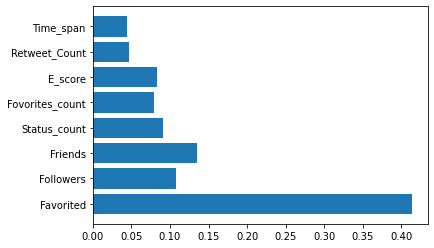

In [ ]:
plt.barh(x_train.columns, clf_random.feature_importances_)

In [ ]:
#prdiction 

In [ ]:
train_predict=clf_random.predict(x_train)
y_predict=clf_random.predict(x_test)

In [ ]:
print("Training accuracy", accuracy_score(y_train,train_predict))
print("Testing accuracy", accuracy_score(y_test,y_predict))

In [ ]:
#training dataset
print(classification_report(y_train,train_predict))

In [ ]:
#testing dataset
print(classification_report(y_test, y_predict))

In [ ]:
clf_random.decision_path(x_train)

In [ ]:
#AUC and ROC

In [ ]:
plotting_roc(y_test, y_predict)

In [ ]:
#class 1
tree_test_pred1= clf_random.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(
    y_test, tree_test_pred1, pos_label = 1)

# AUC score that summarizes the precision recall curve
avg_precision = average_precision_score(y_test, tree_test_pred1)

label = 'Precision Recall AUC: {:.2f}'.format(avg_precision)
plt.plot(recall, precision, lw = 2, label = label)
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.title('Precision Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#class 0
tree_test_pred0= clf_random.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(
    y_test, tree_test_pred0, pos_label = 0)

# AUC score that summarizes the precision recall curve
avg_precision = average_precision_score(y_test, tree_test_pred1)

label = 'Precision Recall AUC: {:.2f}'.format(avg_precision)
plt.plot(recall, precision, lw = 2, label = label)
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.title('Precision Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#one tree visualization 

In [ ]:
feature_names = new_data.columns[:8]
target_names = new_data['Result'].unique().tolist()


In [ ]:
#plotting the tree
plt.figure(figsize=(80,60))
tree.plot_tree(clf_random[0], 
                feature_names = feature_names,
                class_names = str(target_names),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [ ]:
#improve the random forest classifier performance 

In [ ]:
#1-cross validation

In [ ]:
#fc_cv_score = cross_val_score(clf_random,x_train, y_train, cv=10, scoring='roc_auc')
fc_cv_score = StratifiedKFold(n_splits=5,shuffle=False)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print('\n')
# print("=== All AUC Scores ===")
# print(fc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", fc_cv_score.mean())

# auc and roc (Cross Validation)

In [ ]:
# plot arrows
import matplotlib.patches as patches
from scipy import interp

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in fc_cv_score.split(x,y):
    prediction = clf_random.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
#2-hyperparameter for the best estimation 

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

#RandomizedSearchCV

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [ ]:
# Fit the random search model
rf_random.fit(x_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

In [ ]:
#building random forset classifier with best parameters
cl_ran=rf = RandomForestClassifier(n_estimators= 600,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 60,
 bootstrap= False)

In [ ]:
cl_ran.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=600)

In [ ]:
y_n_predict_train=cl_ran.predict(x_train)

In [ ]:
print(classification_report(y_train, y_n_predict_train))

In [ ]:
y_n_predict=cl_ran.predict(x_test)

In [ ]:
print(classification_report(y_test, y_n_predict))

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_n_predict))

In [ ]:
plotting_roc(y_test, y_n_predict)

# Gradiant Boosting Classifier

In [ ]:
#to choose the number of estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,400,600]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = GradientBoostingClassifier(n_estimators=estimator)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
boos_cl=GradientBoostingClassifier(n_estimators=50)

In [ ]:
boos_cl.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
train_pred_log = boos_cl.predict(x_train)

In [ ]:
training_accuracy =( boos_cl.score(x_train,y_train))*100
training_accuracy

In [ ]:
print(classification_report(y_train, train_pred_log))

In [ ]:
test_pred_log = boos_cl.predict(x_test)

In [ ]:
testing_accuracy =( boos_cl.score(x_test,y_test))*100
testing_accuracy

In [ ]:
print(classification_report(y_test, test_pred_log))

In [ ]:
plotting_roc(y_test,test_pred_log)